In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [16]:
import tensorflow as tf
print(tf.__version__)

2.15.0


### MNIST handwritten digit

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

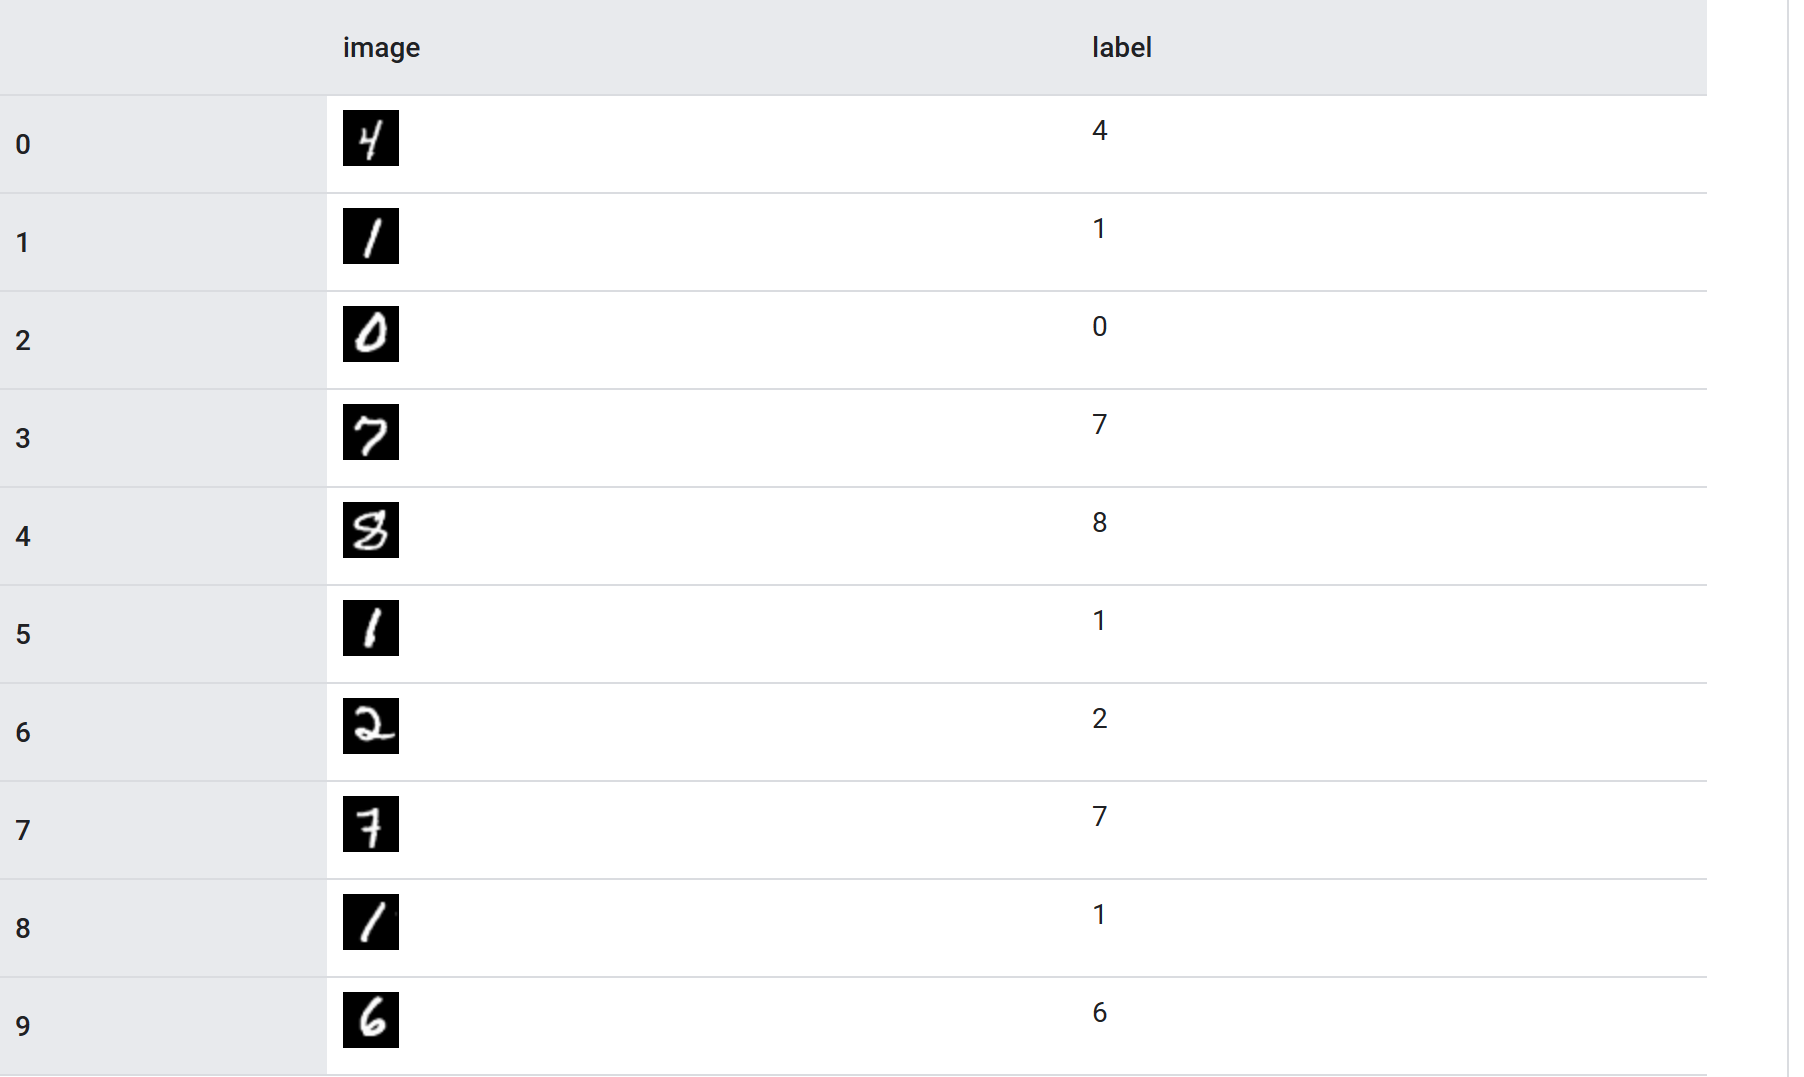


You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network, especially in image processing, for various reasons it will usually learn better if you scale all values between 0 and 1. It is a process called normalization.

In [19]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [20]:
index=0
print(f'label:{y_train[index]}')

label:5


In [21]:
print(f'\nImage PIXEL ARRAY:\n{x_train[index]}')


Image PIXEL ARRAY:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 25

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network, especially in image processing, for various reasons it will usually learn better if you scale all values between 0 and 1. It is a process called normalization.

In [22]:
x_train, x_test = x_train / 255.0, x_test / 255.0

label:5

Image PIXEL ARRAY:
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.     

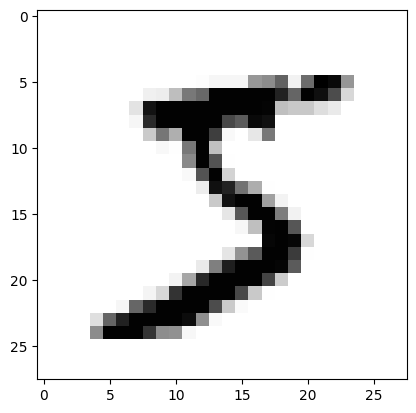

In [23]:
index=0

#set number of characters per row when printing
np.set_printoptions(linewidth=120)

#print the label and image
print(f'label:{y_train[index]}')
print(f'\nImage PIXEL ARRAY:\n{x_train[index]}')
plt.imshow(x_train[index],cmap='Greys')

Sequential: This defines a sequence of layers in the neural network. Flatten:images were 28 by 28 pixel matrix. Flatten just takes that square and turns it into a 1-dim array. Dense: add a layer of neurons Each layer of neurons need an activation function to tell them what to do.


The important things to look at are the first and the last layers. The last layer has 10 neurons in it because we have ten classes of digits in the dataset. They should always match. The first layer is a flatten layer with the input shaping 28 by 28. Now, if you remember our images are 28 by 28, so we're specifying that this is the shape that we should expect the data to be in. Flatten takes this 28 by 28 square and turns it into a simple linear array.

In [47]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

The compile() method: specifying a loss, metrics, and an optimizer
To train a model with fit(), you need to specify a loss function, an optimizer, and optionally, some metrics to monitor.

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.______(optimizer='adam',
              loss=loss_fn,
              metrics=[________])

Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

https://keras.io/api/models/model_training_apis/

In [48]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics = ['acc'])

model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2925 - acc: 0.9146
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1417 - acc: 0.9575
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1054 - acc: 0.9682
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0872 - acc: 0.9728
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0748 - acc: 0.9762


evaluate method
Returns the loss value & metrics values for the model in test mode.

In [49]:
model.evaluate(x_test, y_test, verbose='2')

[0.07531493157148361, 0.9753999710083008]

Given template output:

313/313 - 1s - loss: 0.0747 - accuracy: 0.9780 - 1s/epoch - 4ms/step

[0.07466930150985718, 0.9779999852180481]